In [ ]:
%matplotlib inline

# Prepare the ImageNet dataset

The `ImageNet <http://www.image-net.org/>`_ project contains millions of images
and thousands of objects for image classification. It is widely used in the
research community for benchmarking state-of-the-art models.

<img src="file://../../_static/imagenet_banner.jpeg" width="500 px">

The dataset has multiple versions. The one commonly used for image
classification is `ILSVRC 2012
<http://www.image-net.org/challenges/LSVRC/2012/>`_. This tutorial will go
through the steps of preparing this dataset for GluonCV.

<div class="alert alert-info"><h4>Note</h4><p>You need at least 300 GB disk space to download and extract the dataset. SSD
   (Solid-state disks) is preferred over HDD because of faster speed.</p></div>

## Download

First, go to the `download page <http://www.image-net.org/download-images>`_
(you may need to register an account), and find the page for
ILSVRC2012. Next, find and download the following two files:

======================== ======
Filename                 Size
======================== ======
ILSVRC2012_img_train.tar 138 GB
ILSVRC2012_img_val.tar   6.3 GB
======================== ======

## Setup

First, please download the helper script
:download:`imagenet.py<../../../scripts/datasets/imagenet.py>`
validation image info :download:`imagenet_val_maps.pklz<../../../scripts/datasets/imagenet_val_maps.pklz>`.
Make sure to put them in the same directory.

Assuming the tar files are saved in folder ``~/ILSVRC2012``. We can use the
following command to prepare the dataset automatically.

.. code-block:: bash

   python imagenet.py --download-dir ~/ILSVRC2012

<div class="alert alert-info"><h4>Note</h4><p>Extracting the images may take a while. For example, it takes
   about 30min on an AWS EC2 instance with EBS.</p></div>

By default ``imagenet.py`` will extract the images into
``~/.mxnet/datasets/imagenet``. You
can specify a different target folder by setting ``--target-dir``.


## Read with GluonCV

The prepared dataset can be loaded with utility class :py:class:`gluoncv.data.ImageNet`
directly. Here is an example that randomly reads 128 images each time and
performs randomized resizing and cropping.



In [7]:
from gluoncv.data import ImageNet
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms

train_trans = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

# You need to specify ``root`` for ImageNet if you extracted the images into
# a different folder
root='/data/ImageNet/imagenet'
train_data = DataLoader(
    ImageNet(train=True, root=root).transform_first(train_trans),
    batch_size=128, shuffle=True)

In [8]:
for x, y in train_data:
    print(x.shape, y.shape)
    break

(128, 3, 224, 224) (128,)


Plot some validation images



<AxesSubplot:>

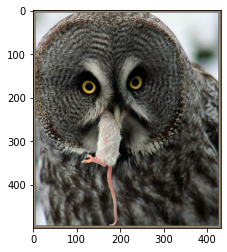

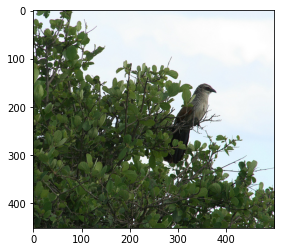

In [9]:
from gluoncv.utils import viz
val_dataset = ImageNet(train=False, root=root)
viz.plot_image(val_dataset[1234][0])  # index 0 is image, 1 is label
viz.plot_image(val_dataset[4567][0])